In [1]:
import sys
sys.path.append('/Users/anwesh/opt/anaconda3/envs/tf/lib/python3.9/site-packages/')

In [2]:
from tensorflow.keras.applications import VGG19

In [3]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, PReLU, BatchNormalization, LeakyReLU, Dense, add, Flatten, UpSampling2D, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG19
from sklearn.model_selection import train_test_split
from numpy.random import randint


# %% [markdown]
# ![image.png](attachment:image.png)

# %%
n = 25000

lr_list = os.listdir("lr_images")[:n]

try:
    lr_list.remove(".DS_Store")
except ValueError:
    pass

lr_images = []

for img in lr_list:
    img_lr = cv2.imread("lr_images/"+img)
    img_lr = cv2.cvtColor(img_lr, cv2.COLOR_BGR2RGB)
    lr_images.append(img_lr)

hr_list = os.listdir("hr_images")[:n]

try:
    hr_list.remove(".DS_Store")    
except ValueError:
    pass

hr_images = []

for img in hr_list:
    img_hr = cv2.imread("hr_images/"+img)
    img_hr = cv2.cvtColor(img_hr, cv2.COLOR_BGR2RGB)
    hr_images.append(img_hr)


# %%
lr_images = np.array(lr_images)
hr_images = np.array(hr_images)

# %%
lr_images = lr_images / 255.
hr_images = hr_images / 255.

# %%
lr_train, lr_test, hr_train, hr_test = train_test_split(lr_images, hr_images, 
                                                      test_size=0.3, random_state=42)

# %%
hr_shape = (hr_train.shape[1], hr_train.shape[2], hr_train.shape[3])
lr_shape = (lr_train.shape[1], lr_train.shape[2], lr_train.shape[3])

In [4]:
generator = load_model('new_gen_e_10.h5', compile=False)

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-22 13:16:49.190176: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-22 13:16:49.191415: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
[X1, X2] = [lr_test, hr_test]
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]

# # generate image from source
gen_image = generator.predict(src_image)

2023-03-22 13:16:54.530040: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-22 13:16:54.739213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 782ms/step


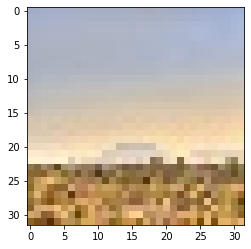

In [6]:
plt.imshow(src_image[0])

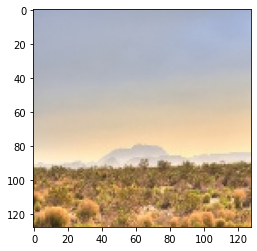

In [7]:
plt.imshow(tar_image[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


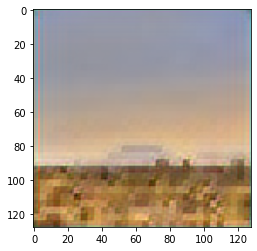

In [8]:
plt.imshow(gen_image[0])